## Homework 5 (A prerequisite for Project)

In your project, you are expected to evaluate alternative trading strategies (i.e. algorithmic trading). "Algorithmic or Quantitative trading is the process of designing and developing trading strategies based on mathematical and statistical analyses" ([source](https://www.freecodecamp.org/news/algorithmic-trading-in-python/)). This requires a connection to a data source and this homework is related to setting up the required connections and some simple data manipulation steps. 


### Task 1
This task requires to set up a free account for Quandl API [https://docs.data.nasdaq.com/](https://docs.data.nasdaq.com/). This [link](https://docs.data.nasdaq.com/docs/python-installation) provides the details about installation of the quandl module and setting up authentication details to get relevant information.

- Install quandl using command window (or web interface will also work fine if you use Anaconda Navigator) <br> 
pip install quandl
- Check if it is installed by importing the module as below. If there is no error, you are good to go.

In [19]:
import quandl, json

- Create an account if you do not have any from the [link](https://data.nasdaq.com/sign-up). Signing-up as "academic" is suggested.
- You will receive your API key once you complete your registration. 
- If you already have an account, you can find your API key from your account details.
- We will import pandas and quandl modules to check if everything works. 
- Set your API key (i.e. register within Python)
- Send a sample data request.

In [9]:
import pandas as pd
import quandl as q
# set the API key
q.ApiConfig.api_key = "Ni35jjhw-rsdz5MY81bb"

#send a get request to query Tesla's end of day stock prices from 1st #Jan, 2010 to 1st Jan, 2019
tesla_data = q.get("WIKI/TSLA", start_date="2010-01-01", end_date="2018-01-01")

# check the first 5 rows of the dataframe
tesla_data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0
2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0
2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0


Note that get method requires certain arguments in some form. The details of the call is provided [here](https://docs.data.nasdaq.com/docs/parameters-2#section-times-series-parameters). We made a request to TESLA's daily prices between two dates by "WIKI/TSLA". WIKI is a data product code. The details on the data organization is provided [here](https://docs.data.nasdaq.com/docs/data-organization). Some of the products are free as you can see from the link. We have used "WIKI" free product which is "End of Day US Stock Prices" to get TESLA prices. There are some other prices/indices that are available for free. You can check those in you are interested.

Once you have obtained the information in a pandas dataframe, this task is completed.

In [10]:
import copy
tesla_data_work= copy.deepcopy(tesla_data)

### Task 2

Implement a function that calculates simple moving average (SMA) of closing prices. Note that simple moving average calculates the average of the values in the most recent past $k$ periods (day in our case). Therefore the function will take an argument "number of periods". Technical analysis people like to use such statistics in order to make trading decisions. You can find [this link](https://www.profitaddaweb.com/2017/07/smasimple-moving-average-technical.html) useful.

In [11]:
def calculate_sma(dataframe,period):dataframe['SMA']=dataframe.Close.rolling(period).mean()
calculate_sma(tesla_data_work,10)
tesla_data_work

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,SMA
Date,,,,,,,,,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0,NaN
2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0,NaN
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0,NaN
2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0,NaN
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,329.51,330.9214,324.82,325.20,4186131.0,0.0,1.0,329.51,330.9214,324.82,325.20,4186131.0,334.612
2017-12-26,323.83,323.9400,316.58,317.29,4321909.0,0.0,1.0,323.83,323.9400,316.58,317.29,4321909.0,333.450
2017-12-27,316.00,317.6800,310.75,311.64,4645441.0,0.0,1.0,316.00,317.6800,310.75,311.64,4645441.0,330.511


### Task 3

Implement a function that calculates simple moving standard deviation of closing prices so that one can have some understanding of the volatility in the prices. 

In [12]:
def calculate_smdev(dataframe,period):dataframe['SMDEV']=dataframe.Close.rolling(period).std()
calculate_smdev(tesla_data_work,10)
tesla_data_work

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,SMA,SMDEV
Date,,,,,,,,,,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0,NaN,NaN
2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0,NaN,NaN
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0,NaN,NaN
2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0,NaN,NaN
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,329.51,330.9214,324.82,325.20,4186131.0,0.0,1.0,329.51,330.9214,324.82,325.20,4186131.0,334.612,6.160465
2017-12-26,323.83,323.9400,316.58,317.29,4321909.0,0.0,1.0,323.83,323.9400,316.58,317.29,4321909.0,333.450,8.134962
2017-12-27,316.00,317.6800,310.75,311.64,4645441.0,0.0,1.0,316.00,317.6800,310.75,311.64,4645441.0,330.511,10.151305


### Task 4

Assume that you are asked to devise a simple trading strategy which takes moving standard deviation and average into account. As an example, you may end up with such a strategy:

- If moving standard deviation is larger than some number, do nothing (this is kind of a risk averse setting)
- If last price observed is larger than the average, buy the stock, sell otherwise.

This is just a very simple example based on the moving statistics of the closing prices. You may end up with a better strategy. In order to understand if the strategy is reasonable, we generally try to see the performance of the trading algorithm using a predefined past period. This is so called backtesting. This will be done in a paper-trading setting. A paper trade is a simulated trade that allows an investor to practice buying and selling without risking real money. Note that paper trading may not be representative of the real trade because of the market dynamics.

Here we will assume that you have 1 unit of money allowed for trading each day. You can invest or keep it. If you pass investing on a day (because of some rule you use like in the volatility example above), it is assumed that you lost the opportunity (in other words, the money to be invested is not accumulated for the use on the next day).

Implement a trading strategy based on the statistics and evaluate the strategy for the year 2017 on the Tesla prices. You need to keep track of the everyday actions in a pandas dataframe then report the invested money and total value of your investment at the end of the year. Report relevant statistics (be creative here).

In [13]:
tesla_data_work['SIGNAL']=0
tesla_data_work.loc[
    (tesla_data_work.Close>tesla_data_work.SMA) &
    (tesla_data_work.SMDEV<tesla_data_work.SMDEV.rolling(5).mean())
    ,'SIGNAL']=1
tesla_data_work.loc[
    (tesla_data_work.Close<tesla_data_work.SMA) &
    (tesla_data_work.SMDEV<tesla_data_work.SMDEV.rolling(5).mean())
    ,'SIGNAL']=-1
tesla_data_work.SIGNAL.replace(to_replace=0, method='ffill',inplace=True)
tesla_data_work['SIGNAL_PRO']=0
tesla_data_work.loc[tesla_data_work.SIGNAL!=tesla_data_work.SIGNAL.shift(1),'SIGNAL_PRO']=tesla_data_work.SIGNAL
tesla_data_work.SIGNAL=tesla_data_work.SIGNAL_PRO
tesla_data_work.drop(columns='SIGNAL_PRO',inplace=True)
tesla_data_work.SIGNAL.value_counts()

 0    1632
 1     129
-1     129
Name: SIGNAL, dtype: int64

NameError: name 'plt' is not defined

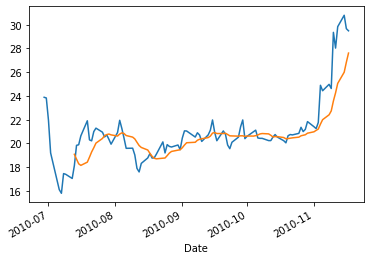

In [30]:
plt_df=tesla_data_work.iloc[0:100]
ax=plt_df.Close.plot()
plt_df.SMA.plot(ax=ax)
# plt_df.SMDEV.plot(ax=ax,secondary_y=True,color='yellow',alpha=0.8)
for val in plt_df.loc[plt_df.SIGNAL!=0].index:
    plt.axvline(x=val,color={-1:'yellow',1:'blue'}[plt_df.loc[plt_df.index==val].iloc[0]['SIGNAL']],alpha=0.6,zorder=2)

### Task 5

One important baseline strategy that is commonly used in trading algorithm evaluation is buy and hold strategy. Assume that you have invested 1 unit of money every day (in the form of a "buy" decision) and hold it. What is the final status of your investment. Compare with your proposed strategy.

In [27]:
#Rules
#-Shortselling is not an option
#(assuming rf=0)
money=100
tesla_data_work['PORTFOLIO']=0
tesla_data_work.loc[tesla_data_work.SIGNAL==1,'PORTFOLIO']=money/tesla_data_work.shift(1).Open
tesla_data_work['PORTFOLIO'].replace(to_replace=0, method='ffill',inplace=True)
tesla_data_work['PNL_OPEN']=0
tesla_data_work.loc[tesla_data_work.PORTFOLIO!=-0,'PNL_OPEN']=(tesla_data_work.PORTFOLIO*tesla_data_work.Close)-money
tesla_data_work['PNL']=0
tesla_data_work.loc[tesla_data_work.SIGNAL==-1,'PNL']=(tesla_data_work.PORTFOLIO*tesla_data_work.Open.shift(1))-money
tesla_data_work.loc[tesla_data_work.SIGNAL==-1,'PORTFOLIO']=0


if tesla_data_work.iloc[-1]['PORTFOLIO']!=0:
    tesla_data_work.iloc[-1,tesla_data_work.columns.get_loc('PNL')]=tesla_data_work.iloc[-1]['PORTFOLIO']*tesla_data_work.iloc[-1]['Close']-money
stats={
    'Total Number of Trades':len(tesla_data_work.loc[tesla_data_work.SIGNAL==1]),
    'Total Number of Transactions ( Buy & Sell )':len(tesla_data_work.loc[tesla_data_work.SIGNAL!=0]),
    'Total PnL':round(tesla_data_work.PNL.sum(),2),
    'Profitable Trades':len(tesla_data_work.loc[tesla_data_work.PNL>0]),
    'Unprofitable Trades':len(tesla_data_work.loc[tesla_data_work.PNL<0]),
    'Profitable Trades Ratio':str(round(len(tesla_data_work.loc[tesla_data_work.PNL>0])/(len(tesla_data_work.loc[tesla_data_work.PNL<0])+len(tesla_data_work.loc[tesla_data_work.PNL>0])),2))+ '%',
    'Sharpe by Unrealized Profits ':round(tesla_data_work.loc[tesla_data_work.PORTFOLIO!=0]['PNL_OPEN'].mean()/tesla_data_work.loc[tesla_data_work.PORTFOLIO!=0]['PNL_OPEN'].std(),2),
    'Sharpe by Realized Profits':round(tesla_data_work.loc[tesla_data_work.SIGNAL==-1].PNL.mean()/tesla_data_work.loc[tesla_data_work.SIGNAL==-1].PNL.std(),2)
}
print(json.dumps(stats,indent=4))
pd.DataFrame([stats]).T.rename(columns={0:'Stats'})

{
    "Total Number of Trades": 129,
    "Total Number of Transactions ( Buy & Sell )": 258,
    "Total PnL": 926.56,
    "Profitable Trades": 97,
    "Unprofitable Trades": 33,
    "Profitable Trades Ratio": "0.75%",
    "Sharpe by Unrealized Profits ": 0.41,
    "Sharpe by Realized Profits": 0.41
}


,Stats
Total Number of Trades,129
Total Number of Transactions ( Buy & Sell ),258
Total PnL,926.56
Profitable Trades,97
Unprofitable Trades,33
Profitable Trades Ratio,0.75%
Sharpe by Unrealized Profits,0.41
Sharpe by Realized Profits,0.41


In [21]:
tesla_data_work

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,SMA,SMDEV,SIGNAL,PORTFOLIO,PNL_OPEN,PNL
Date,,,,,,,,,,,,,,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0,NaN,NaN,0,0.000000,0.000000,0.000000
2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0,NaN,NaN,0,0.000000,0.000000,0.000000
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0,NaN,NaN,0,0.000000,0.000000,0.000000
2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0,NaN,NaN,0,0.000000,0.000000,0.000000
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0,NaN,NaN,0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,329.51,330.9214,324.82,325.20,4186131.0,0.0,1.0,329.51,330.9214,324.82,325.20,4186131.0,334.612,6.160465,0,0.320513,4.230769,0.000000
2017-12-26,323.83,323.9400,316.58,317.29,4321909.0,0.0,1.0,323.83,323.9400,316.58,317.29,4321909.0,333.450,8.134962,0,0.320513,1.695513,0.000000
2017-12-27,316.00,317.6800,310.75,311.64,4645441.0,0.0,1.0,316.00,317.6800,310.75,311.64,4645441.0,330.511,10.151305,0,0.320513,-0.115385,0.000000


<AxesSubplot:ylabel='Frequency'>

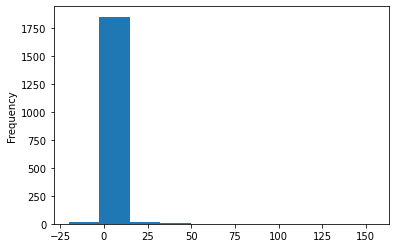

In [22]:
tesla_data_work.PNL.plot(kind='hist')

In [23]:
buyholdpnl=(tesla_data_work.iloc[-1].Close-tesla_data_work.iloc[0].Close)/tesla_data_work.iloc[0].Close*money
print(round((buyholdpnl)))
status={True:'Outperforms',False:'Underperforms'}[buyholdpnl>tesla_data_work.PNL.sum()]
print(f'Buy and Hold Strategy our {status} Trading Strategy')

1203
Buy and Hold Strategy our Outperforms Trading Strategy
